In [1]:
using Statistics, Plots, StatsPlots, DataFrames, Distributions, Random, FFTW
Plots.GRBackend()

Plots.GRBackend()

In [41]:
function PowerSpectrum(x::Vector = [nothing], f::Bool = false;
                            data::Vector = x, full::Bool = f)::Vector{Float64}
    X = zeros(length(data)*2-1)
    X[1:length(data)] .= (data .- mean(data))
    X = abs2.(fft(X))
    if full
        return X
    else
        return X[1:length(data)]
    end
end

function AutoCorrelation(x::Vector = [nothing], l::Int64=10; 
                            data::Vector = x, lag::Int64 = l )::Vector{Float64}
    X = PowerSpectrum(data = data, full = true)
    X = real.(ifft(X))[1:lag]
    return X
end


AutoCorrelation (generic function with 3 methods)

In [45]:
function AutoCorrelation(x::Vector = [nothing], l::Int64=10; 
                             data::Vector = x, lag::Int64 = l )::Vector{Float64}
    X = PowerSpectrum(data = data, full = true)
    X = real.(ifft(X))[1:lag]
    X = X./X[1]
    return X
end


AutoCorrelation (generic function with 3 methods)

In [46]:

AutoCorrelation(data = a)


10-element Vector{Float64}:
 1.0
 0.97
 0.9400120012001201
 0.9100480048004799
 0.8801200120012002
 0.8502400240024003
 0.8204200420042005
 0.7906720672067207
 0.7610081008100812
 0.7314401440144016

In [47]:
function Correlogram(x::Vector = [nothing], l::Int64 = 10, k::Dict =Dict(); data::Vector = x, lag::Int64 = l, kwargs::Dict = k)
    x::Vector{Float64} = collect(1:lag)
    y::Vector{Float64} = AutoCorrelation(data = data,lag = lag)
    return plot(x, y; kwargs)
end

Correlogram (generic function with 4 methods)

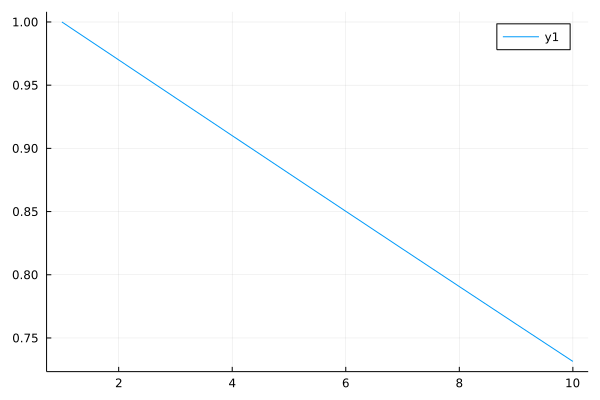

In [50]:
Correlogram(data = a,lag = 10)

In [ ]:
cor(x2[2:end],y2[1:end-1])

0.6134622993912086

In [ ]:
cor(x2[3:end],y2[1:end-2])

0.2644564343166779

In [ ]:
cor(x2[4:end],y2[1:end-3])

-0.30880636230465036

In [ ]:
a./3.973464670919501

13-element Vector{ComplexF64}:
  0.9707253433941508 + 0.0im
  1.6178755723235838 + 0.0im
   1.186442086370628 + 0.0im
  0.6831030194255132 + 0.0im
 -0.6471502289294339 + 0.0im
  -1.797639524803982 + 0.0im
 -3.5233734686158047 + 0.0im
 -2.2290730107569376 + 0.0im
 -0.6111974384333541 + 0.0im
 0.32357511446471665 + 0.0im
   1.330253248354947 + 0.0im
  1.4021588293471063 + 0.0im
  1.2943004578588673 + 0.0im